In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import normal, seed, choice
import matplotlib.pyplot as plt

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyc.csv')
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [5]:
# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [6]:
# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


In [7]:
data.head(5)

,ozone,pm25,co
date,,,
1999-07-01,0.012024,20.000000,1.300686
1999-07-02,0.027699,23.900000,0.958194
1999-07-03,0.043969,36.700000,1.194444
1999-07-04,0.035161,39.000000,1.081548
1999-07-05,0.038359,28.171429,0.939583


<Figure size 864x576 with 0 Axes>

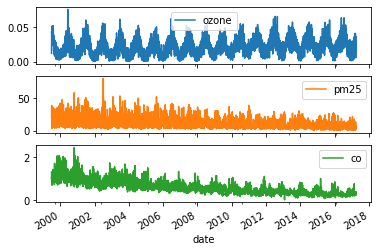

In [8]:
# Plot data
plt.figure(figsize=(12,8))
data.plot(subplots=True)
plt.legend
plt.show();

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yahoo.csv')
data.head(5)

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    782 non-null    object 
 1   price   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [11]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    782 non-null    datetime64[ns]
 1   price   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.3 KB


In [13]:
data.set_index('date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [14]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = data.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


<Figure size 864x720 with 0 Axes>

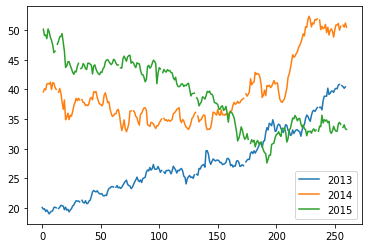

In [15]:
# Plot prices
plt.figure(figsize=(12,10))
ax = prices.plot()
plt.show();

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/co_cities.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [17]:
data.shape

(1898, 3)

In [18]:
# Set the frequency to calendar daily
data = data.asfreq('D')
data.head(10)

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-02,NaN,NaN,NaN
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
2005-01-07,0.625000,0.584556,0.735915
2005-01-08,0.608334,0.173052,0.815625
2005-01-09,0.397917,0.115987,0.619081


In [19]:
data.shape

(2191, 3)

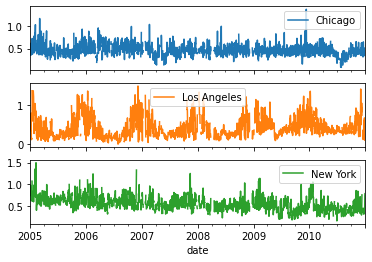

In [20]:
# Plot the data
data.plot(subplots=True)
plt.show()

In [21]:
# Set the frequency to calendar daily
data = data.asfreq('M')
data.head(10)

,Chicago,Los Angeles,New York
date,,,
2005-01-31,0.850000,0.800498,0.799479
2005-02-28,0.575000,0.397600,0.780729
2005-03-31,0.412500,0.432972,0.740672
2005-04-30,0.502083,0.291304,0.716382
2005-05-31,0.520834,0.292753,0.615625
2005-06-30,0.479167,0.184265,0.740828
2005-07-31,0.370833,0.141395,0.652837
2005-08-31,0.450000,0.197826,0.523958
2005-09-30,0.466667,0.781250,0.569271


In [22]:
data.shape

(72, 3)

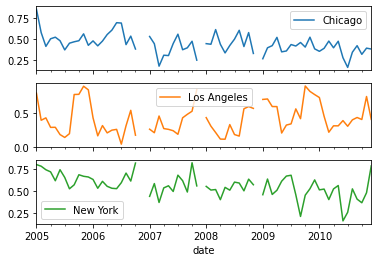

In [23]:
# Plot the data
data.plot(subplots=True)
plt.show()

In [24]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/google.csv', parse_dates=['Date'], index_col='Date')
data

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [25]:
# Set data frequency to business daily
data = data.asfreq('B')

# Create 'lagged' and 'shifted'
data['lagged'] = data.Close.shift(periods=-90)
data['shifted'] = data.Close.shift(periods=90)

data

,Close,lagged,shifted
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN
...,...,...,...
2016-12-26,NaN,NaN,772.15
2016-12-27,791.55,NaN,772.08
2016-12-28,785.05,NaN,769.64


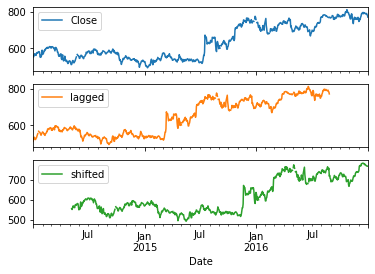

In [26]:
data.plot(subplots=True)
plt.show();

             Close  lagged  shifted  daily_return  monthly_return  \
Date                                                                
2014-01-02  556.00  511.00      NaN           NaN             NaN   
2014-01-03  551.95  518.73      NaN     -0.728417             NaN   
2014-01-06  558.10  529.92      NaN      1.114231             NaN   
2014-01-07  568.86  533.09      NaN      1.927970             NaN   
2014-01-08  570.04  526.65      NaN      0.207432             NaN   
...            ...     ...      ...           ...             ...   
2016-12-26     NaN     NaN   772.15      0.000000        7.313064   
2016-12-27  791.55     NaN   772.08      0.207619        4.358660   
2016-12-28  785.05     NaN   769.64     -0.821174        2.690718   
2016-12-29  782.79     NaN   769.41     -0.287880        1.498904   
2016-12-30  771.82     NaN   769.54     -1.401398        1.483157   

            annual_return  
Date                       
2014-01-02            NaN  
2014-01-03        

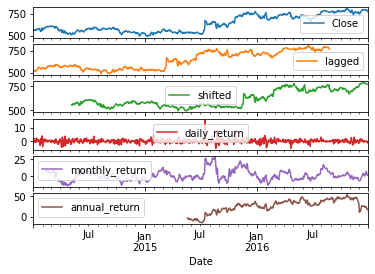

In [27]:
# Create daily_return
data['daily_return'] = data.Close.pct_change(periods=1).mul(100)

# Create monthly_return
data['monthly_return'] = data.Close.pct_change(periods=30).mul(100)

# Create annual_return
data['annual_return'] = data.Close.pct_change(periods=360).mul(100)

# Print Dataframe
print(data)

# Plot the result
data.plot(subplots=True)
plt.show();


In [28]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yahoo.csv', parse_dates=['date'], index_col='date')
data.head(5)

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [29]:
# Created shifted_30 here
data['shifted_30'] = data.price.shift(periods=30)

# Subtract shifted_30 from price
data['change_30'] = data['price'] - data['shifted_30']
data['change_30lambda'] = data.apply(lambda row: row['price'] - row['shifted_30'], axis=1)

# Get the 30-day price difference
data['diff_30'] = data.price.diff(periods=30)

data.sample(10)

,price,shifted_30,change_30,change_30lambda,diff_30
date,,,,,
2015-10-09,32.52,33.14,-0.62,-0.62,-0.62
2015-11-09,33.68,27.60,6.08,6.08,6.08
2014-11-20,51.25,41.10,10.15,10.15,10.15
2015-02-17,43.53,49.21,-5.68,-5.68,-5.68
2015-02-16,NaN,49.13,NaN,NaN,NaN
2015-03-02,44.11,NaN,NaN,NaN,NaN
2013-09-02,NaN,27.86,NaN,NaN,NaN
2013-04-29,24.43,22.01,2.42,2.42,2.42
2013-08-30,27.12,29.11,-1.99,-1.99,-1.99


In [30]:
data.tail()

,price,shifted_30,change_30,change_30lambda,diff_30
date,,,,,
2015-12-25,NaN,32.19,NaN,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18,1.18
2015-12-30,33.37,32.98,0.39,0.39,0.39
2015-12-31,33.26,32.62,0.64,0.64,0.64


In [31]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
data.head(5)

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [32]:
# Inspect prices here
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


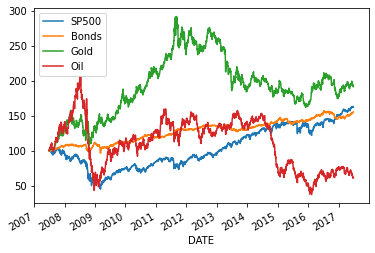

In [33]:
# Select first prices
first_prices = data.iloc[0,]

# Create normalized
normalized = data.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


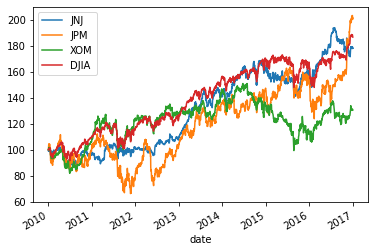

In [34]:
# Import stock prices and index here
stocks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data_norm = data.div(data.iloc[0]).mul(100)
data_norm.plot()
plt.show();

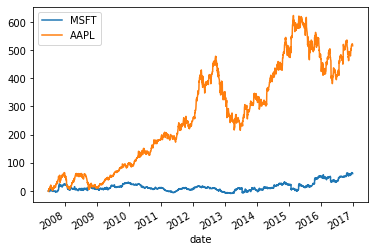

In [35]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show();

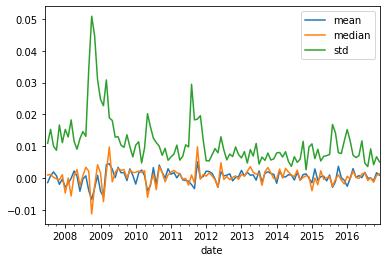

In [36]:
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show();

In [37]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


            AAPL  MSFT
date                  
2007-01-07   NaN   NaN
2007-01-14   NaN   NaN
2007-01-21   NaN   NaN
2007-01-28   NaN   NaN
2007-02-04   NaN   NaN
             AAPL   MSFT
date                    
2007-01-07  12.21  29.93
2007-01-14  13.87  31.16
2007-01-21  12.40  30.72
2007-01-28  12.28  30.53
2007-02-04  11.99  29.61
             AAPL   MSFT
date                    
2007-01-07  12.15  29.64
2007-01-14  13.52  31.21
2007-01-21  12.64  31.11
2007-01-28  12.20  30.60
2007-02-04  12.11  30.19


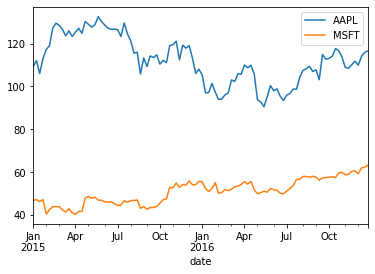

In [38]:
# Import data here
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_ffill starting 2015 here 
weekly_ffill.loc['2015':,].plot()
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


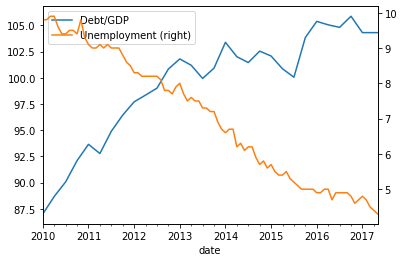

In [39]:
# Import & inspect data here
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show();

In [40]:
# Import & inspect data here
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/debt_unemployment.csv', parse_dates=['date'], index_col='date')
data.drop('Debt/GDP', axis=1, inplace=True)
data

,Unemployment
date,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
...,...
2017-01-01,4.8
2017-02-01,4.7
2017-03-01,4.5


            Unemployment
date                    
2010-01-03           NaN
2010-01-10           NaN
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8


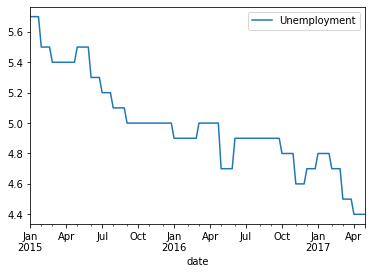

In [41]:
# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_ffill starting 2015 here 
weekly_ffill.loc['2015':,].plot()
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


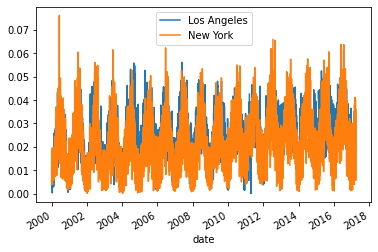

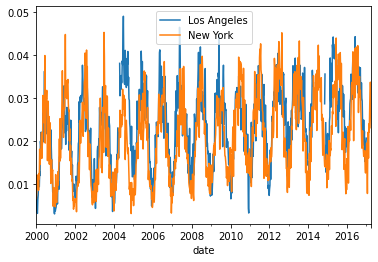

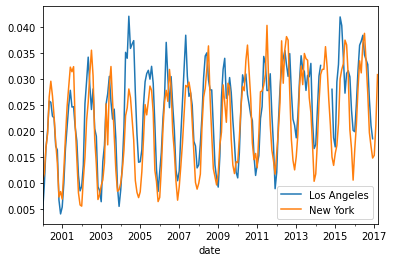

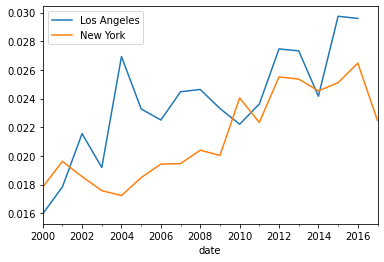

In [42]:
# Import and inspect data here
ozone = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())


# Plot ozone
ozone.plot()
plt.show();


# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show();


# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show();


# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


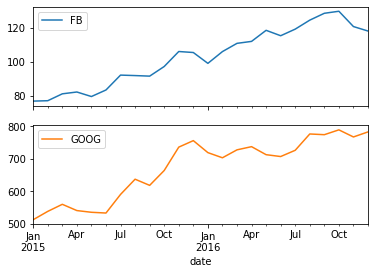

In [43]:
# Import and inspect data here
stocks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()

monthly_average.plot(subplots=True)
plt.show();


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


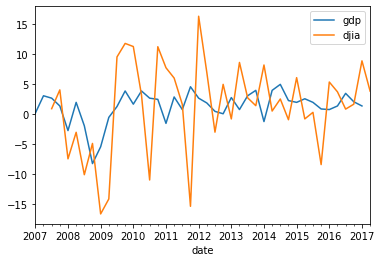

In [44]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


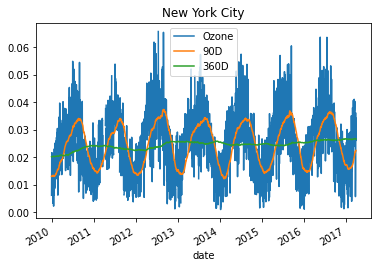

In [45]:
# Import and inspect data here
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data.loc['2010':].plot(title='New York City')
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


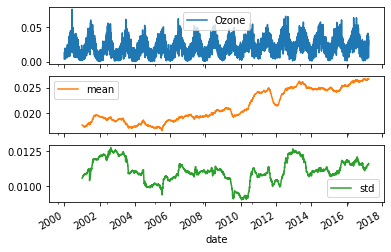

In [46]:
# Import and inspect data here
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

data.dropna(inplace=True)

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(window=360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None


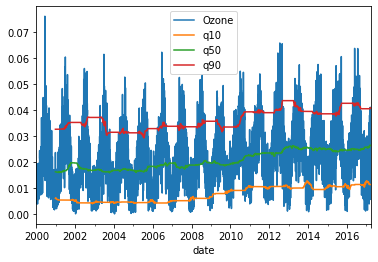

In [47]:
# Import and inspect data here
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.Ozone.rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1).to_frame('q10')
data['q50'] = rolling.quantile(0.5).to_frame('q50')
data['q90'] = rolling.quantile(0.9).to_frame('q90')

# Plot the data
data.plot()
plt.show();

**Window Function**

In [48]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/google.csv', parse_dates=['Date'], index_col='Date')
data

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [49]:
data.dropna(inplace=True)
data

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [50]:
# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

True


In [51]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apple_google.csv', parse_dates=['Date'], index_col='Date')
data

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71
...,...,...
2017-05-24,153.34,954.96
2017-05-25,153.87,969.54
2017-05-26,153.61,971.47


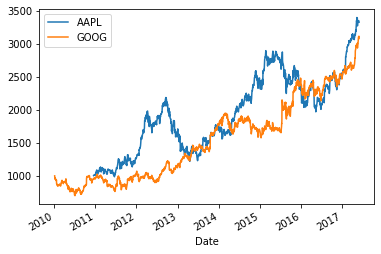

In [52]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(1000).plot()
plt.show()

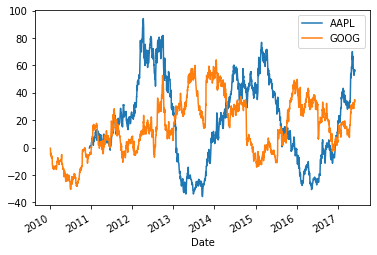

In [53]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window='360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show();

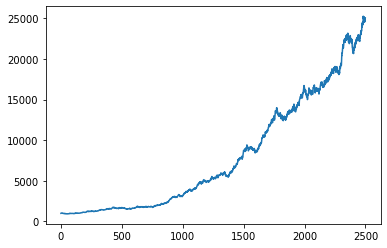

In [54]:
seed(42)

# Create random_walk
random_walk = normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show();

In [55]:
fb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fb.csv', header=None)
fb.columns = ['date', 'stock_price']
fb['date'] = pd.to_datetime(fb.date)
print(fb.info())
fb.set_index('date', inplace=True)
fb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1267 non-null   datetime64[ns]
 1   stock_price  1267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.9 KB
None


,stock_price
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00
...,...
2017-05-24,150.04
2017-05-25,151.96
2017-05-26,152.13


In [56]:
fb.last('Y')

,stock_price
date,
2017-01-03,116.86
2017-01-04,118.69
2017-01-05,120.67
2017-01-06,123.41
2017-01-09,124.90
...,...
2017-05-24,150.04
2017-05-25,151.96
2017-05-26,152.13


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


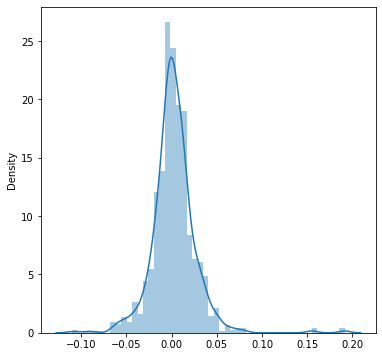

In [57]:
# Set seed here
seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = len(daily_returns)

# Create random_walk
random_walk = choice(daily_returns.stock_price, n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
plt.figure(figsize=(6,6))
sns.distplot(random_walk)
plt.show();

In [58]:
# .append() is only used on dataframes.

In [59]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5_stocks.csv', parse_dates=['Date'], index_col='Date')
data

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48
...,...,...,...,...,...
2017-05-24,153.34,980.35,152.51,78.15,82.29
2017-05-25,153.87,993.38,153.20,78.31,81.75
2017-05-26,153.61,995.78,152.49,78.13,81.55


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


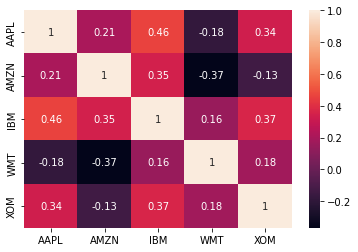

In [60]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

In [61]:
listings = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/listings.xlsx')
listings

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...
355,WYY,WidePoint Corporation,0.4350,3.602423e+07,NaN,Technology,EDP Services
356,WTT,"Wireless Telecom Group, Inc.",1.5200,3.380309e+07,NaN,Capital Goods,Electrical Products
357,XTNT,"Xtant Medical Holdings, Inc.",0.5300,9.589080e+06,NaN,Health Care,Biotechnology: Biological Products (No Diagnos...
358,YUMA,"Yuma Energy, Inc.",2.6150,3.190562e+07,NaN,Energy,Oil & Gas Production


In [62]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           360 non-null    object 
 1   Company Name           360 non-null    object 
 2   Last Sale              346 non-null    float64
 3   Market Capitalization  360 non-null    float64
 4   IPO Year               105 non-null    float64
 5   Sector                 238 non-null    object 
 6   Industry               238 non-null    object 
dtypes: float64(3), object(4)
memory usage: 19.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ACU to ZDGE
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           45 non-null     object 
 1   Last Sale              45 non-null     float64
 2   Market Capitalization  45 non-null     float64
 3   IPO 

In [63]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values(1)
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values(by=['Market Capitalization'], ascending=False))

Sector                 Stock Symbol
Public Utilities       CQP             1.104692e+10
Finance                SEB             4.603773e+09
Basic Industries       SIM             2.123559e+09
Consumer Services      GSAT            1.931551e+09
Health Care            CRHM            6.474389e+08
Energy                 MPO             4.794015e+08
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Technology             MJCO            1.916146e+08
Miscellaneous          AUXO            5.913104e+07
Name: Market Capitalization, dtype: float64
Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
                                   Company Name  Market Capitalization  \
Stock Symbol                                                             
CQP                Cheniere Energy Partners, LP           1.104692e+10   
SEB                        Seaboard Corporatio

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


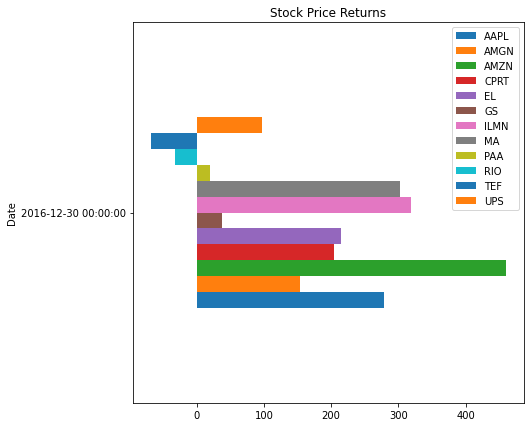

          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   
GS    0.344981  0.390076  0.333402  0.423160  0.358318  1.000000  0.266063   
ILMN  0.264791  0.336927  0.242726  0.265665  0.214027  0.266063  1.000000   
MA    0.391421  0.400230  0.428330  0.401352  0.431556  0.466796  0.301392   
PAA   0.212960  0.229255  0.182438  0.221273  0.206056  0.271982  0.162796   
RIO   0.361684  0.313878  0.326229  0.384944  0.415416  0.527298  0.234445   
TEF   0.325309  0.374555  0.331867  0.376767  0.428925  0.498230  0.231173   
UPS   0.366039  0.432468  0.378399  0.462716  0.456952  0.506407

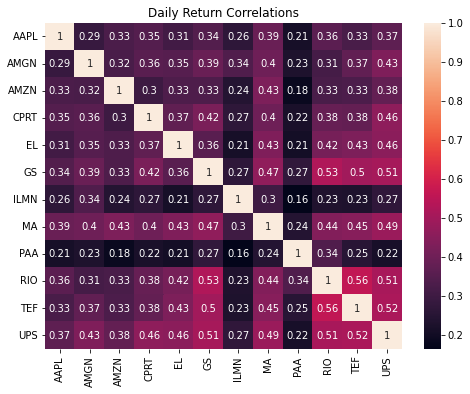

In [64]:
# Import prices and inspect result
stock_prices = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.tail(1).div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values(by='Date', ascending=True).plot(kind='barh', figsize=(7, 7), title='Stock Price Returns', sort_columns=False)
plt.show()

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show();

In [65]:
components = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/components.csv')
components

,Stock Symbol,Market Capitalization,Last Sale,Number of Shares
0,RIO,70431.476895,38.94,1808.717948
1,ILMN,25409.384000,173.68,146.300000
2,CPRT,13620.922869,29.65,459.390316
3,EL,31122.510011,84.94,366.405816
4,AMZN,422138.530626,884.67,477.170618
5,PAA,22223.001416,30.72,723.404994
6,GS,88840.590477,223.32,397.817439
7,AMGN,118927.210535,161.61,735.890171
8,MA,123330.089602,111.22,1108.884100
9,TEF,54609.806092,10.84,5037.804990


Date
2010-01-04     650.08
2010-01-05     654.38
2010-01-06     652.01
2010-01-07     652.01
2010-01-08     656.70
               ...   
2016-12-23    1788.03
2016-12-27    1801.65
2016-12-28    1796.08
2016-12-29    1786.96
2016-12-30    1767.57
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.661457
2010-01-06    100.296887
2010-01-07    100.296887
2010-01-08    101.018336
                 ...    
2016-12-23    275.047686
2016-12-27    277.142813
2016-12-28    276.285996
2016-12-29    274.883091
2016-12-30    271.900381
Length: 1762, dtype: float64


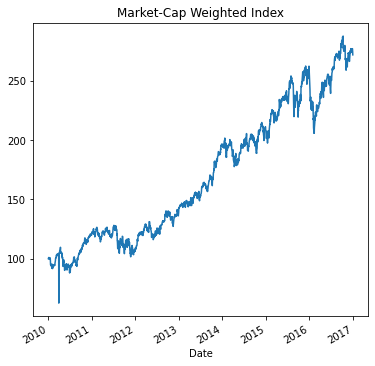

In [66]:
# Aggregate and print the market cap per trading day
raw_index = stock_prices.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index', figsize=(6,6))
plt.show();

171.90038149150882


1800858.87627965


2     0.007564
5     0.012340
1     0.014110
3     0.017282
9     0.030324
0     0.039110
6     0.049332
11    0.050077
7     0.066039
8     0.068484
4     0.234410
10    0.410929
Name: Market Capitalization, dtype: float64




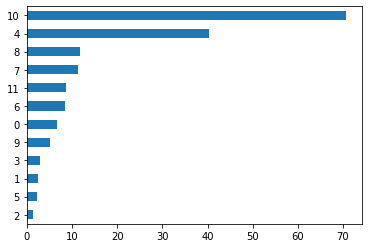

In [67]:
# Calculate and print the index return here
index_return = ((index.iloc[-1]/index.iloc[0]) - 1)*100
print(index_return)
print('\n')

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()
print(total_market_cap)
print('\n')

# Calculate the component weights, and print the result
weights = components['Market Capitalization'].div(total_market_cap)
print(weights.sort_values(ascending=True))
print('\n')

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values(ascending=True).plot(kind='barh')
plt.show();

In [68]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/index.csv')
data.columns = ['Date', 'Index']
data['Date'] = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)
data

,Index
Date,
2010-01-04,100.000000
2010-01-05,100.457394
2010-01-06,99.981005
2010-01-07,99.485328
2010-01-08,100.148231
...,...
2016-12-23,228.675001
2016-12-27,230.172669
2016-12-28,229.360223


In [69]:
djia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/djia2.csv', parse_dates=['DATE'], index_col='DATE')
djia

,DJIA
DATE,
2010-01-04,100.000000
2010-01-05,99.887188
2010-01-06,99.902872
2010-01-07,100.216365
2010-01-08,100.323414
...,...
2016-12-23,188.339809
2016-12-27,188.445912
2016-12-28,187.393754


                 Index       DJIA
Date                             
2016-12-30  126.658267  86.722172


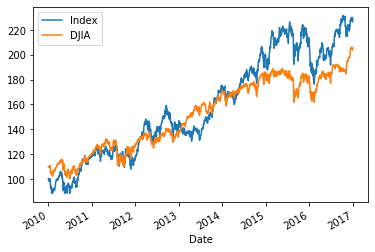

In [70]:
# Normalize djia series and add as new column to data
djia = djia.div(djia.min()).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.last('D').div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show();

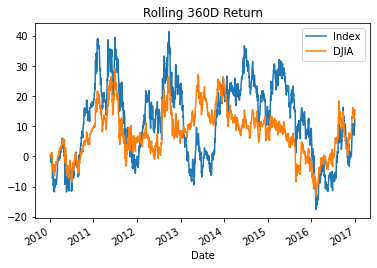

In [71]:
# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r.add(1))- 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show();